## Datasets

| Number of Samples | Sersic Index | PSF  | Noise Level | Signal-to-Noise Ratio | Link                                                  |
| ----------------- | ------------ | ---- | ----------- | --------------------- | ----------------------------------------------------- |
| 200,000           | Discrete     | 0.5  | 200         | From 10 to 100        | https://s3.amazonaws.com/measure.galaxies/data_v1.npz |
| 200,000           | Discrete     | 0.5  | Random      | From 10 to 100        | https://s3.amazonaws.com/measure.galaxies/data_v2.npz |

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Tweak plot resolution and styling
%matplotlib inline
%config InlineBackend.figure_format = "retina"
sns.set(style="white", palette=None, rc={"axes.linewidth": 1})
plt.rc("image", cmap="viridis")

### Data v1

In [2]:
dataset = "data_v1.npz"

with np.load(dataset) as data:
    print("Available variables:", data.files)

    image = data["img"]
    image_nonoise = data["img_nonoise"]
    label = data["label"]
    snr = data["snr"]
    sigma = data["sigma"]
    psf_r = data["psf_r"]

    # Split into 90% train and 10% test (creates a view of the array)
    n_train = int(label.shape[0] * 0.9)
    image_train, image_val = image[:n_train], image[n_train:]

    # Alternatively, split with a stored mask (creates a copy of the array)
    # train_test = data["train_test"]
    # image_train, image_val = image[train_test], image[~train_test]

Available variables: ['img', 'img_nonoise', 'label', 'psf_r', 'snr', 'sigma', 'train_test']


Flux and Sersic radius below are not uniformly distributed due to Signal-to-Noise filtering. All images with an SNR outside of the range [10, 100] were dropped: 

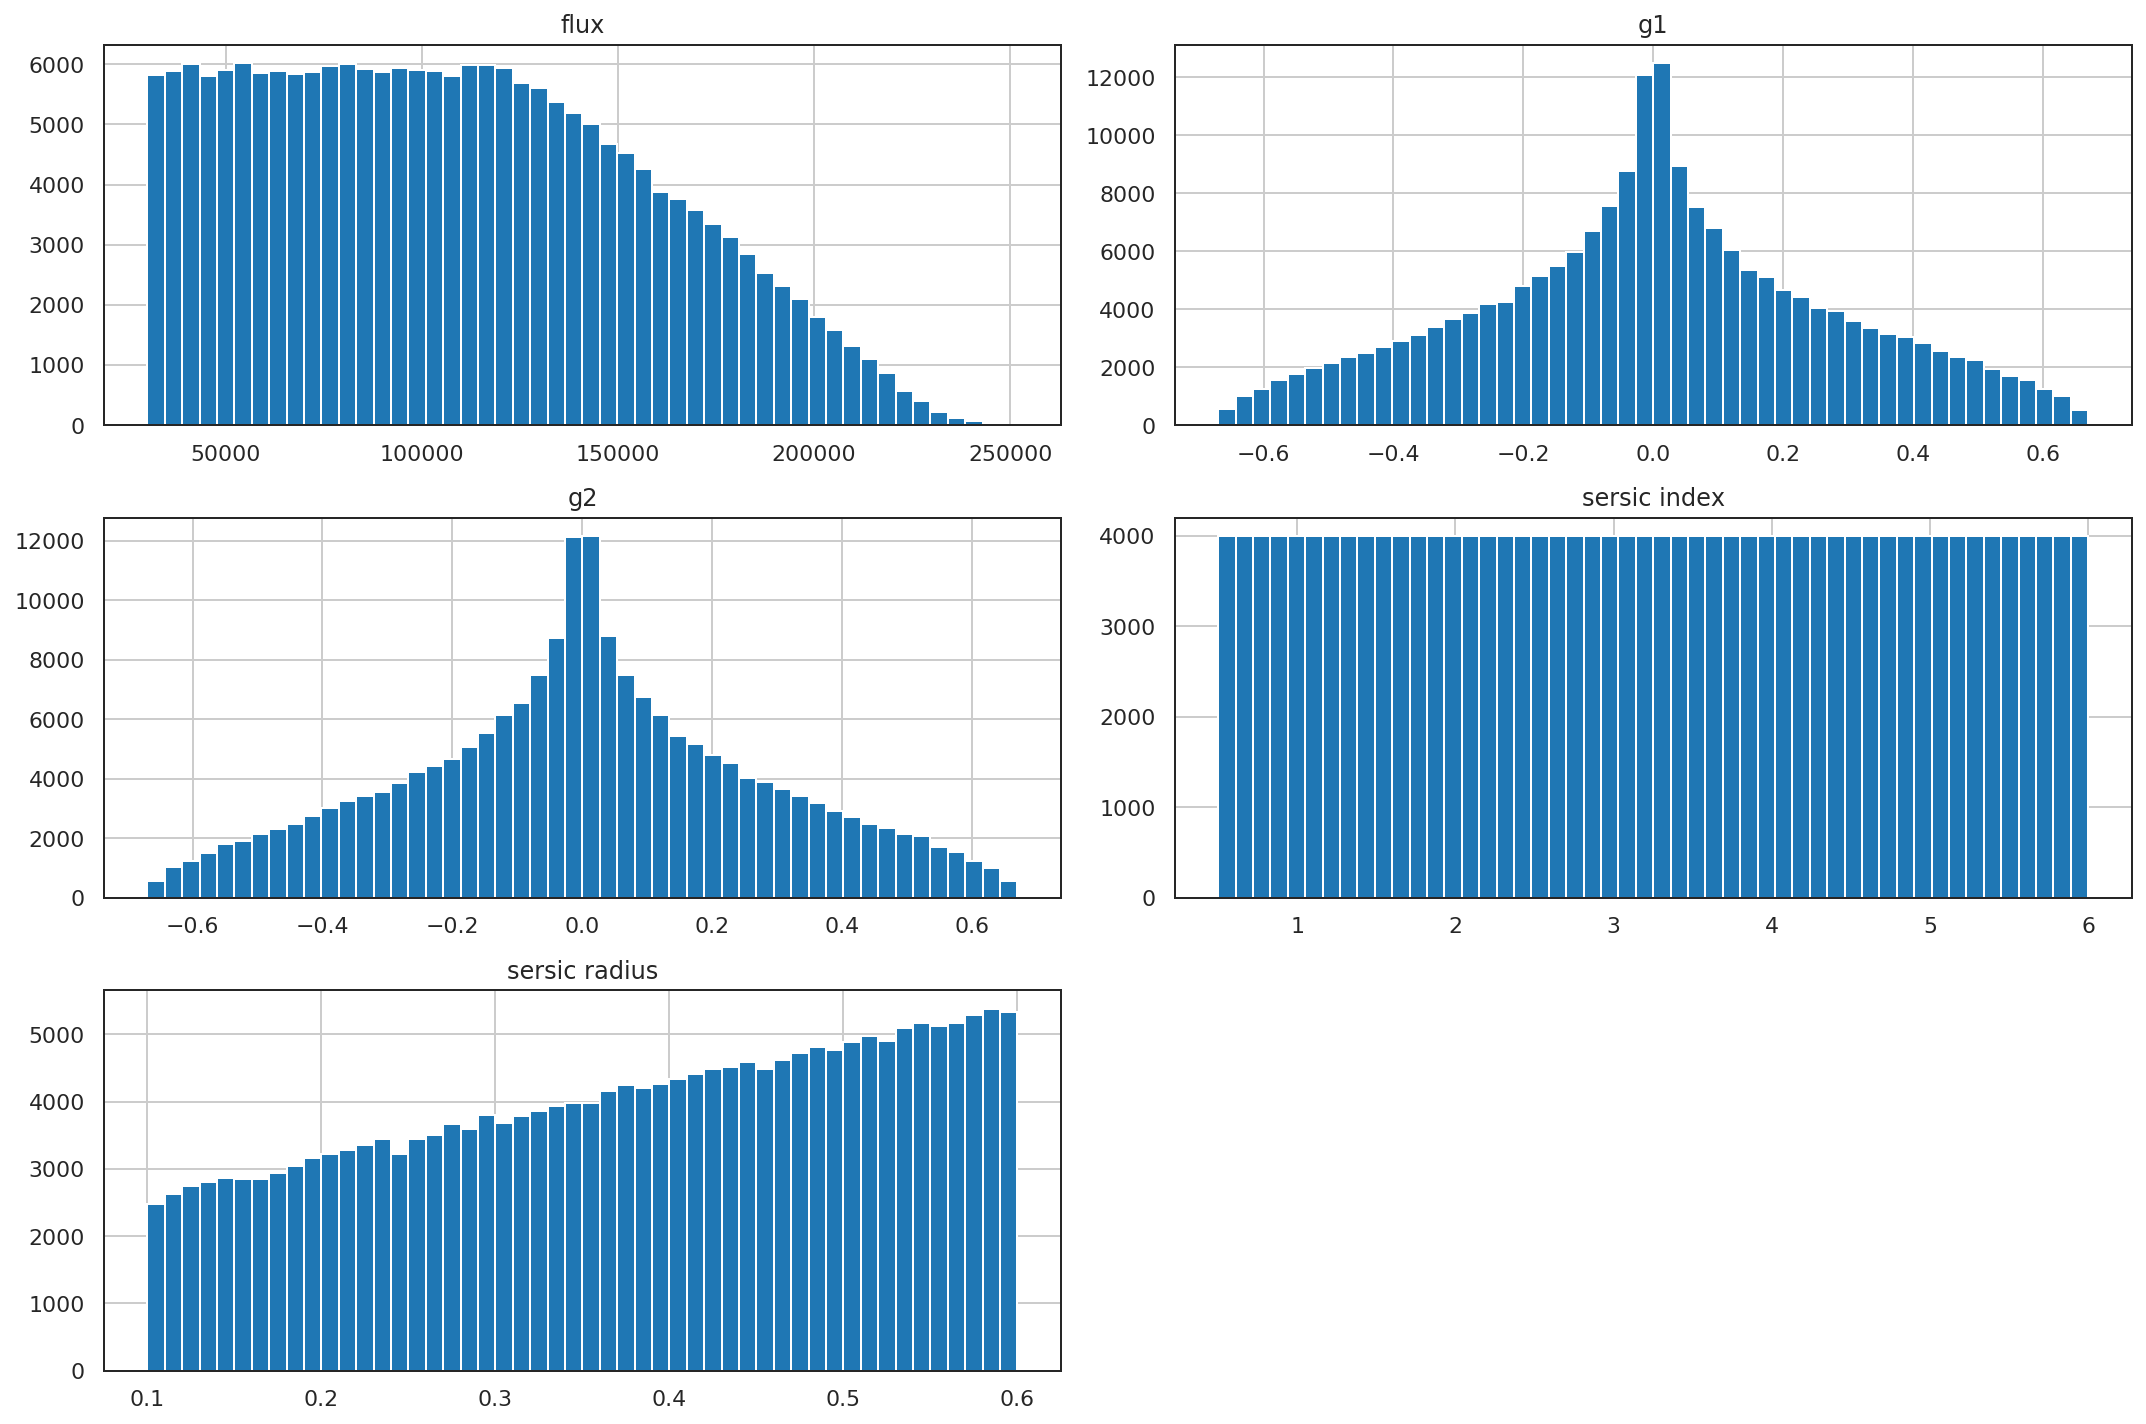

In [3]:
labels = pd.DataFrame(label, columns=["flux", "sersic index", "sersic radius", "g1", "g2"])
labels.hist(bins=50, figsize=(15, 10))
plt.tight_layout();

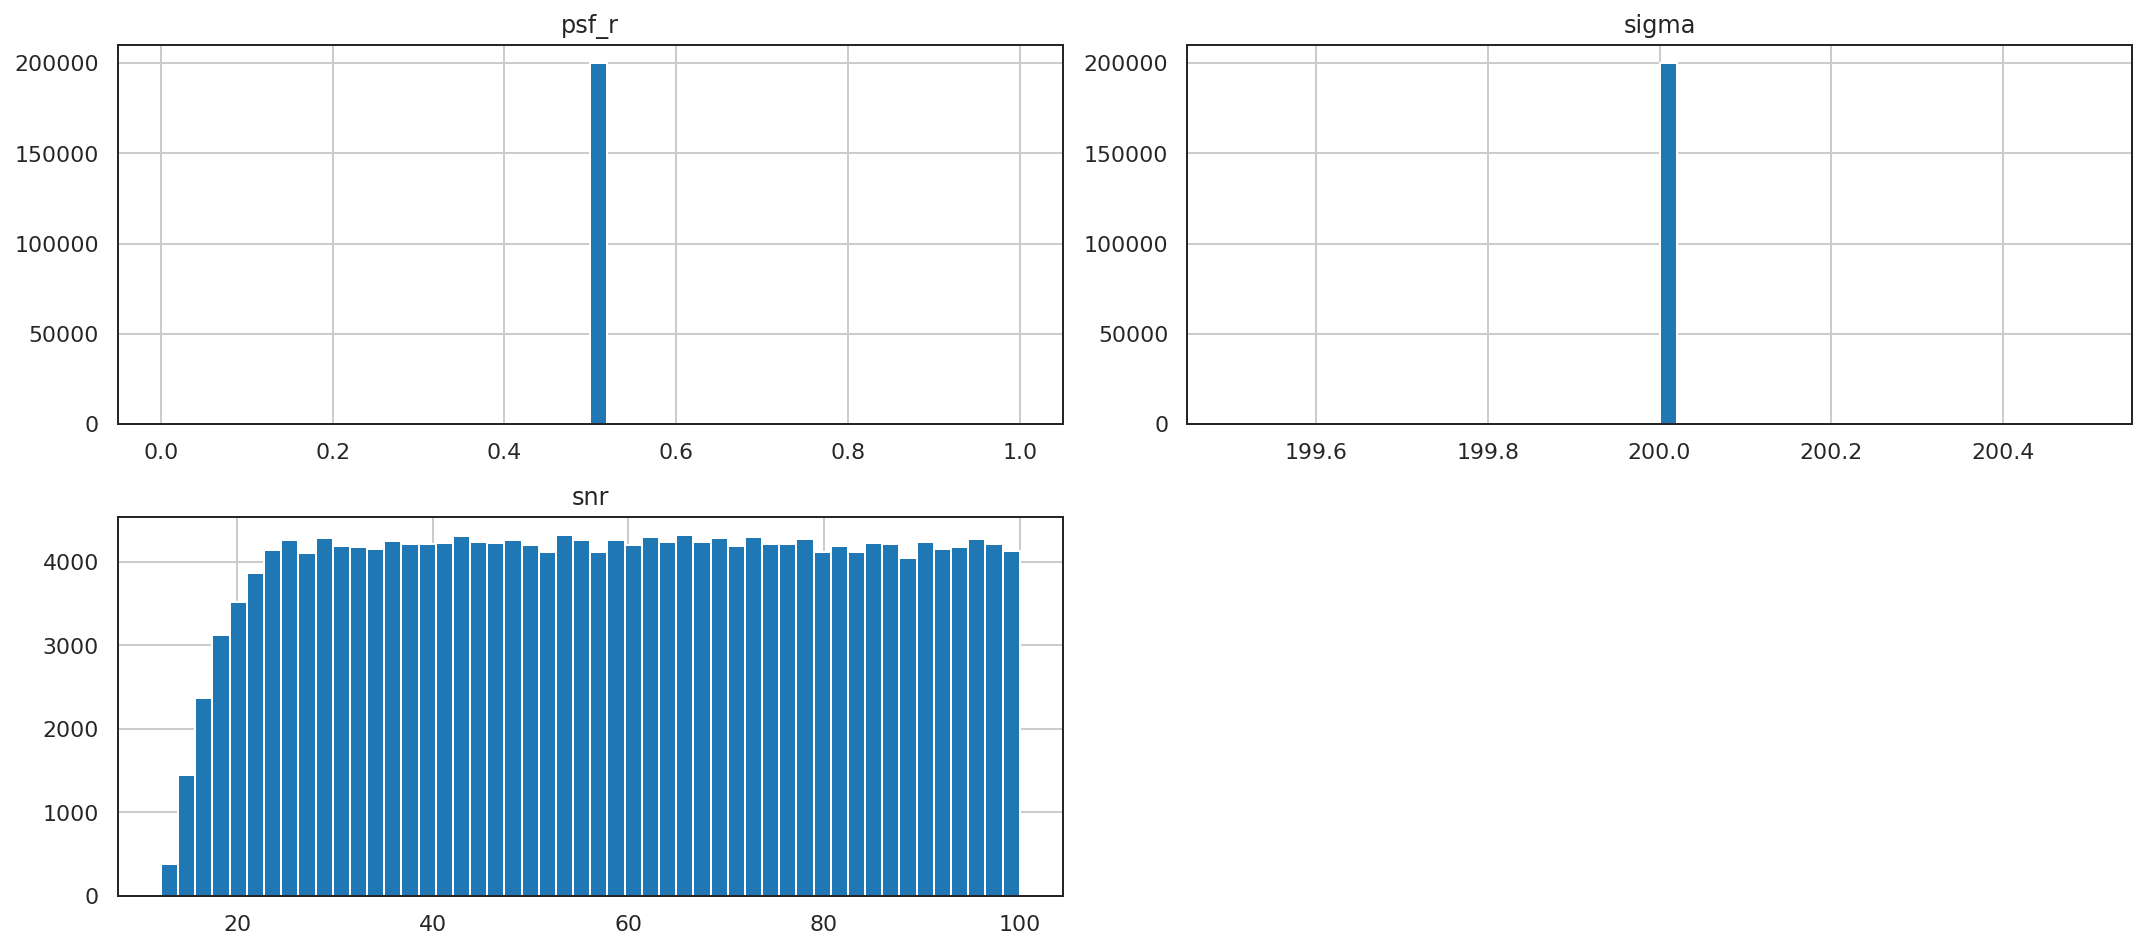

In [4]:
params = pd.DataFrame({"snr": snr, "sigma": sigma, "psf_r": psf_r})
params.hist(bins=50, figsize=(15, 6.7))
plt.tight_layout();

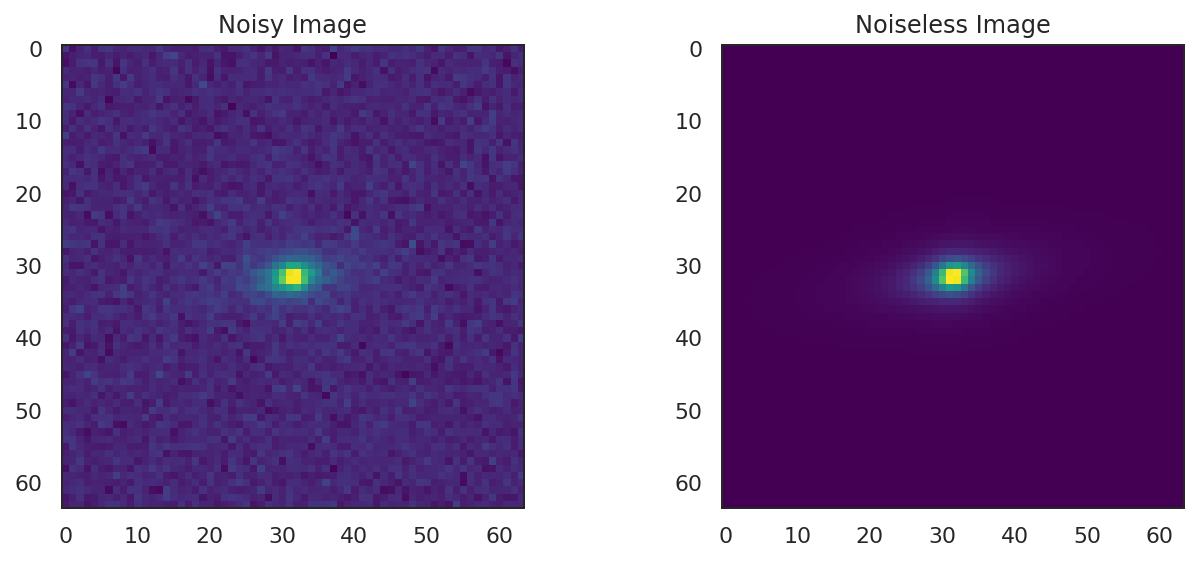

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4), tight_layout=True)
ax[0].imshow(image[0])
ax[0].set_title("Noisy Image")
ax[1].imshow(image_nonoise[0])
ax[1].set_title("Noiseless Image");

### Data v2

In [2]:
dataset = "data_v2.npz"

with np.load(dataset) as data:
    print("Available variables:", data.files)

    image = data["img"]
    image_nonoise = data["img_nonoise"]
    label = data["label"]
    snr = data["snr"]
    sigma = data["sigma"]
    psf_r = data["psf_r"]

    # Split into 90% train and 10% test (creates a view of the array)
    n_train = int(label.shape[0] * 0.9)
    image_train, image_val = image[:n_train], image[n_train:]

    # Alternatively, split with a stored mask (creates a copy of the array)
    # train_test = data["train_test"]
    # image_train, image_val = image[train_test], image[~train_test]

Available variables: ['img', 'img_nonoise', 'label', 'psf_r', 'snr', 'sigma', 'train_test']


Flux and Sersic radius below are not uniformly distributed due to Signal-to-Noise filtering. All images with an SNR outside of the range [10, 100] were dropped: 

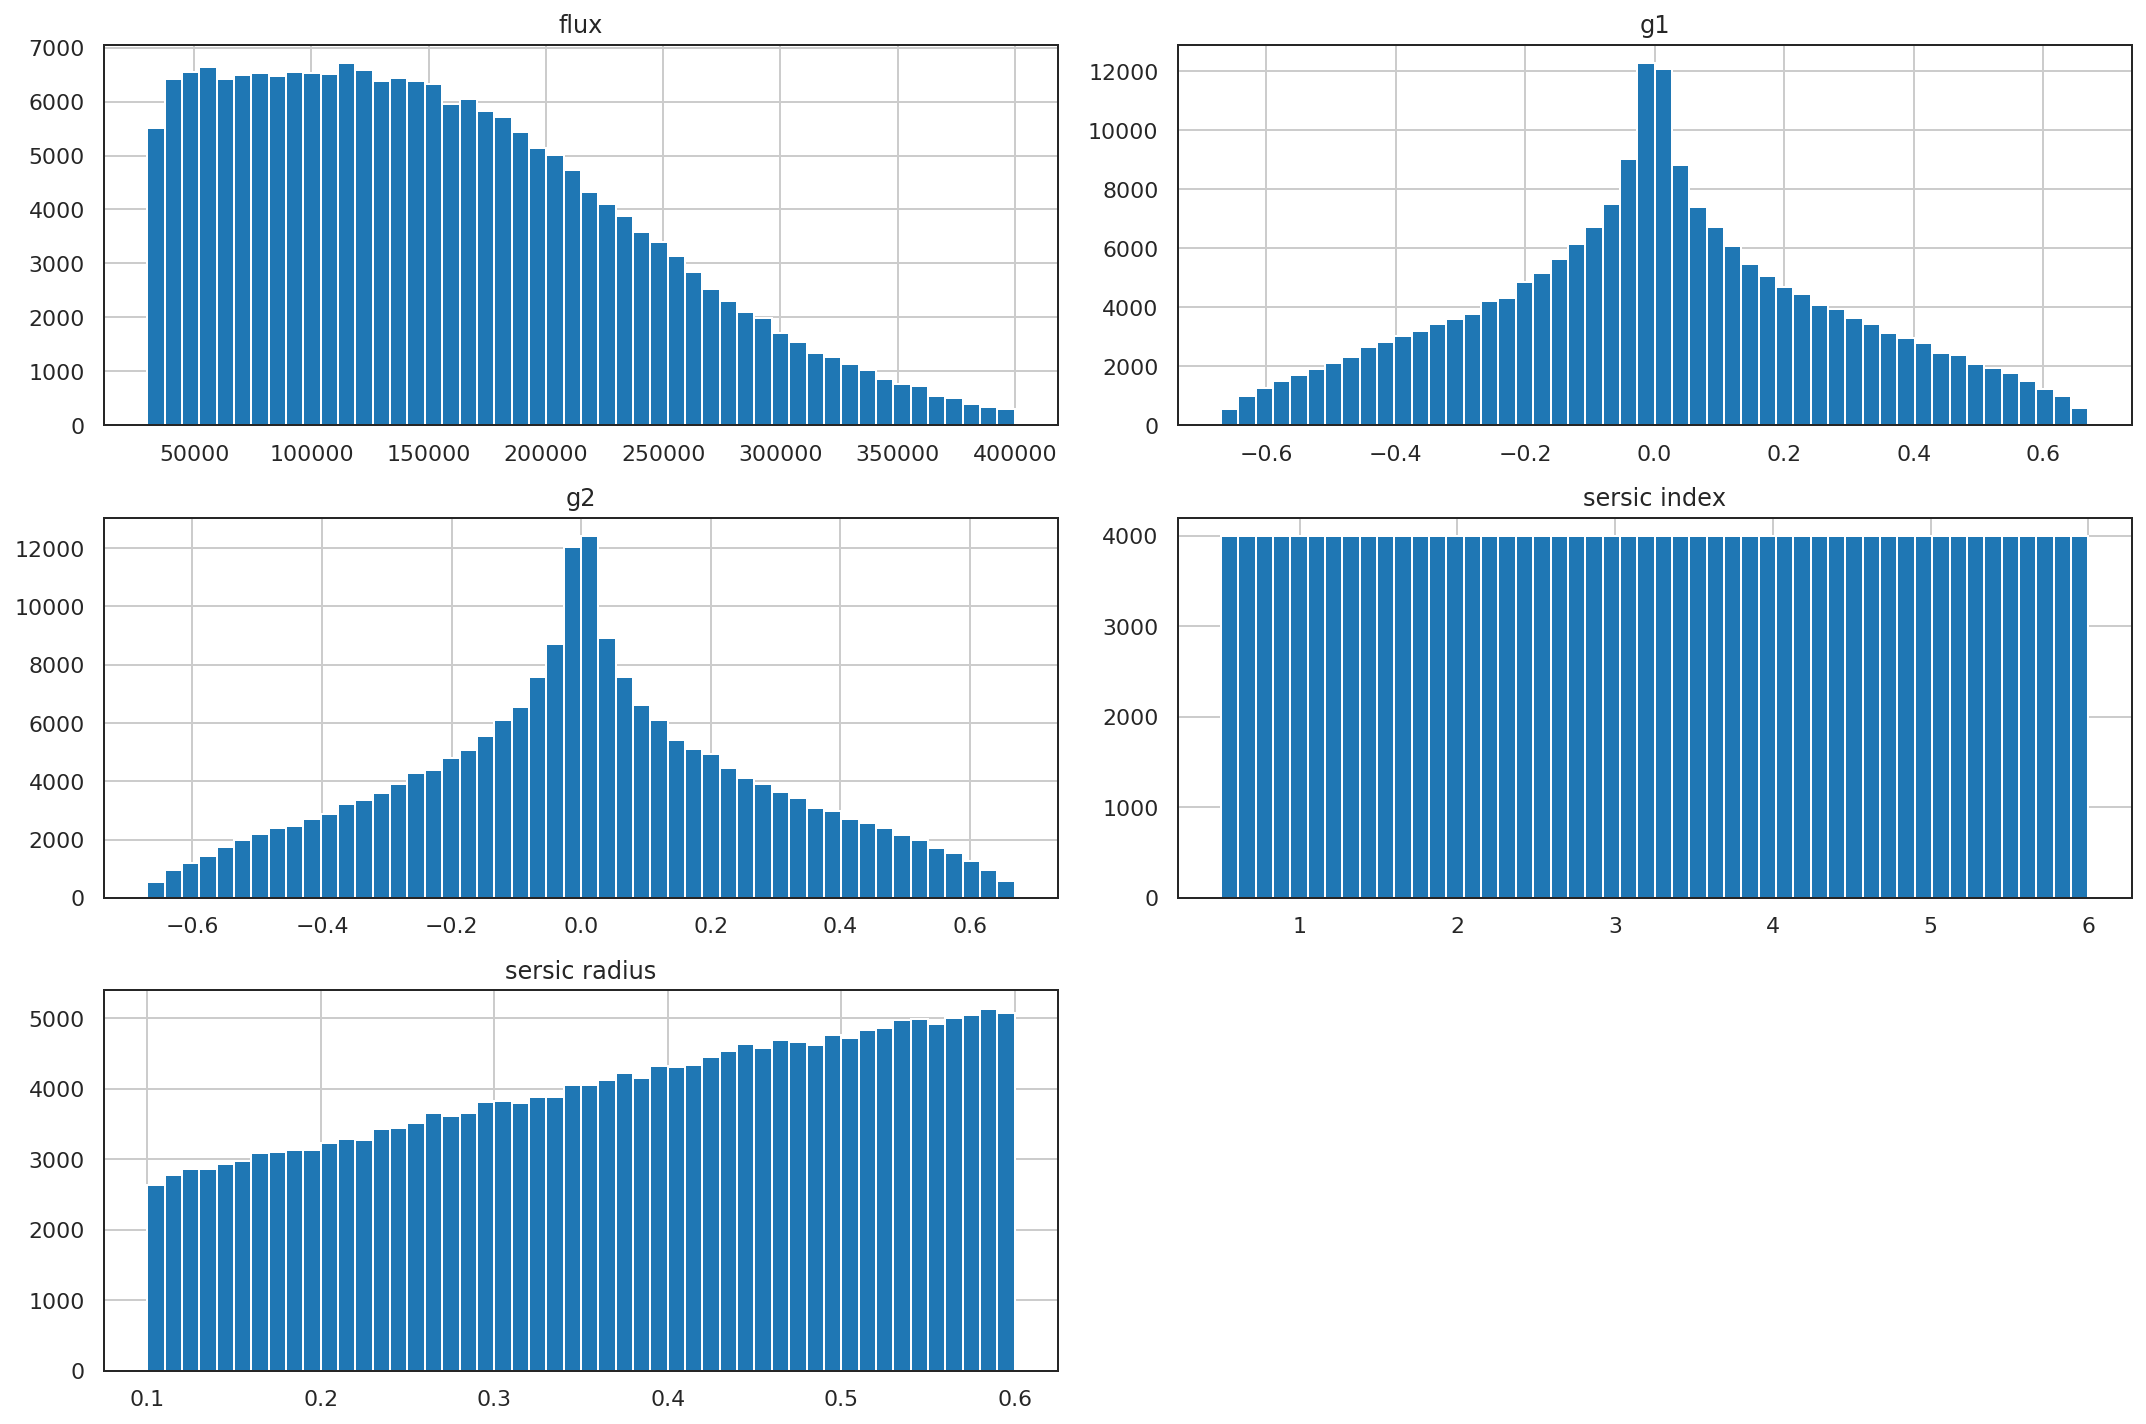

In [3]:
labels = pd.DataFrame(label, columns=["flux", "sersic index", "sersic radius", "g1", "g2"])
labels.hist(bins=50, figsize=(15, 10))
plt.tight_layout();

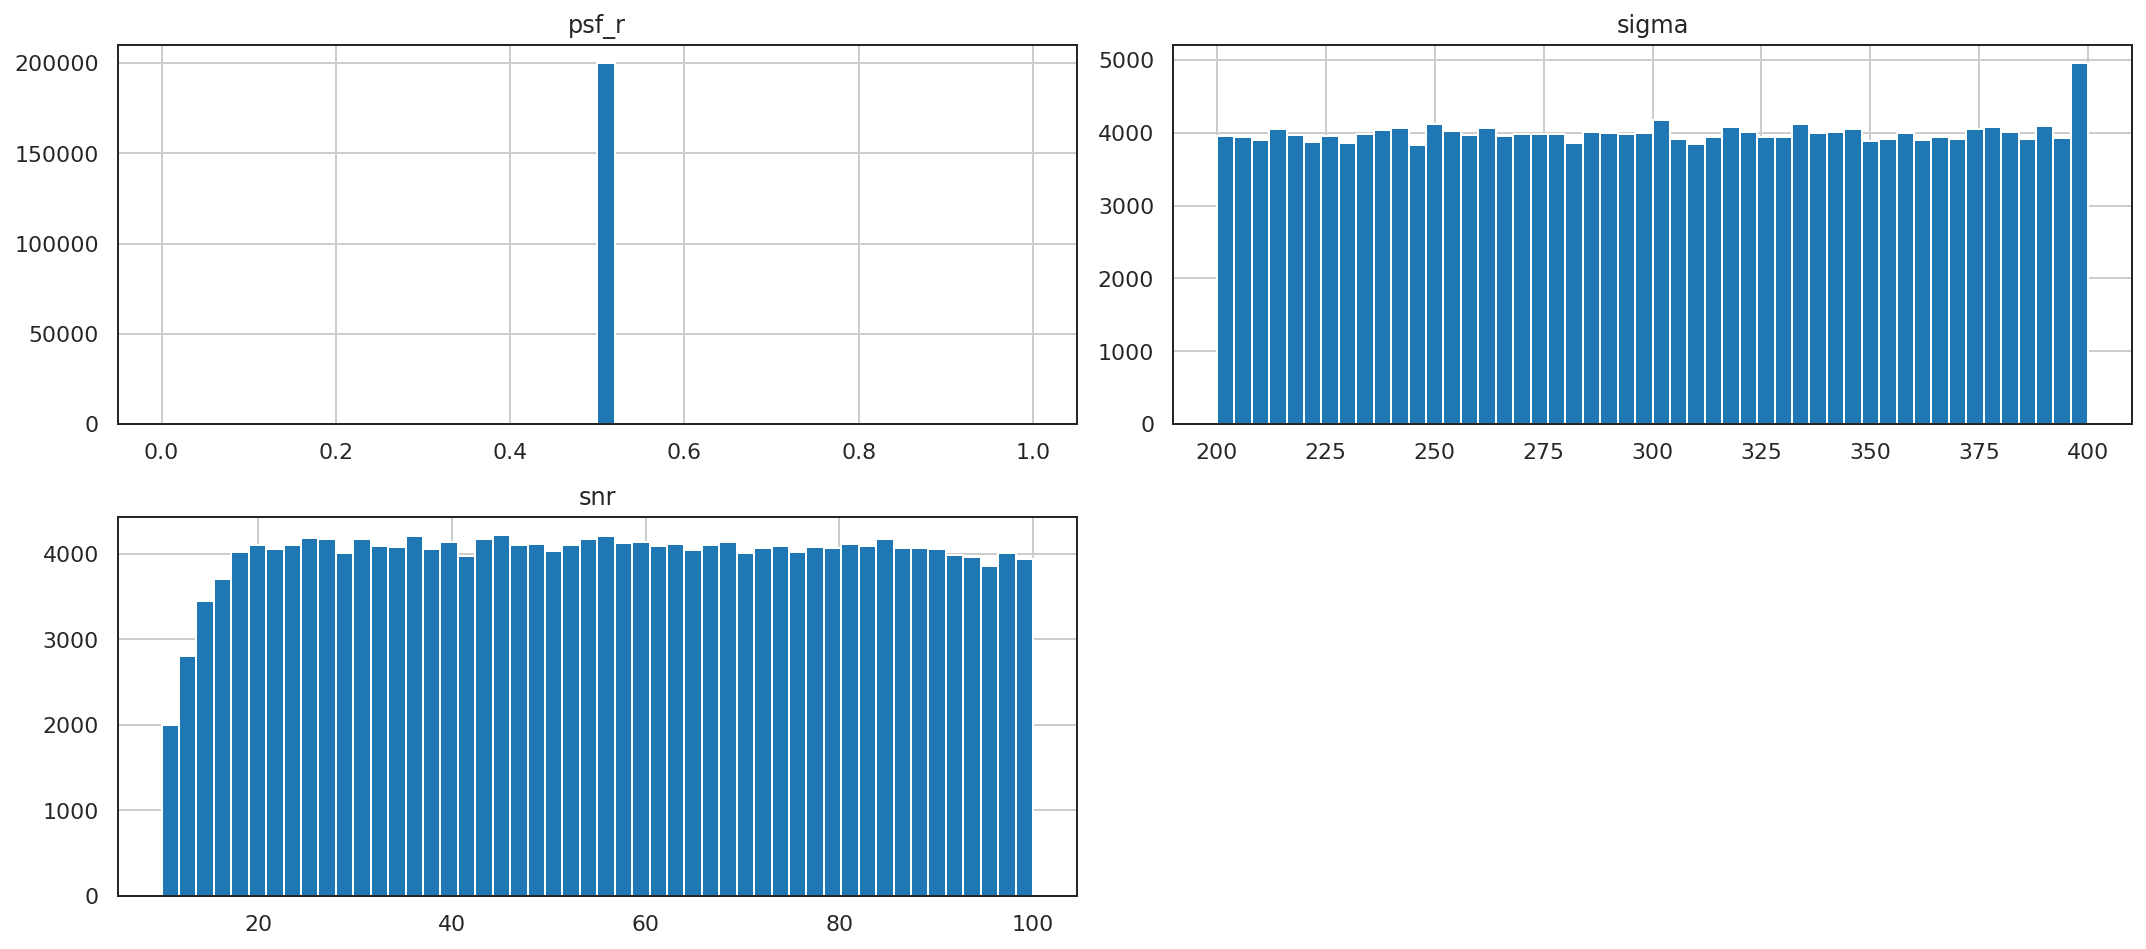

In [4]:
params = pd.DataFrame({"snr": snr, "sigma": sigma, "psf_r": psf_r})
params.hist(bins=50, figsize=(15, 6.7))
plt.tight_layout();

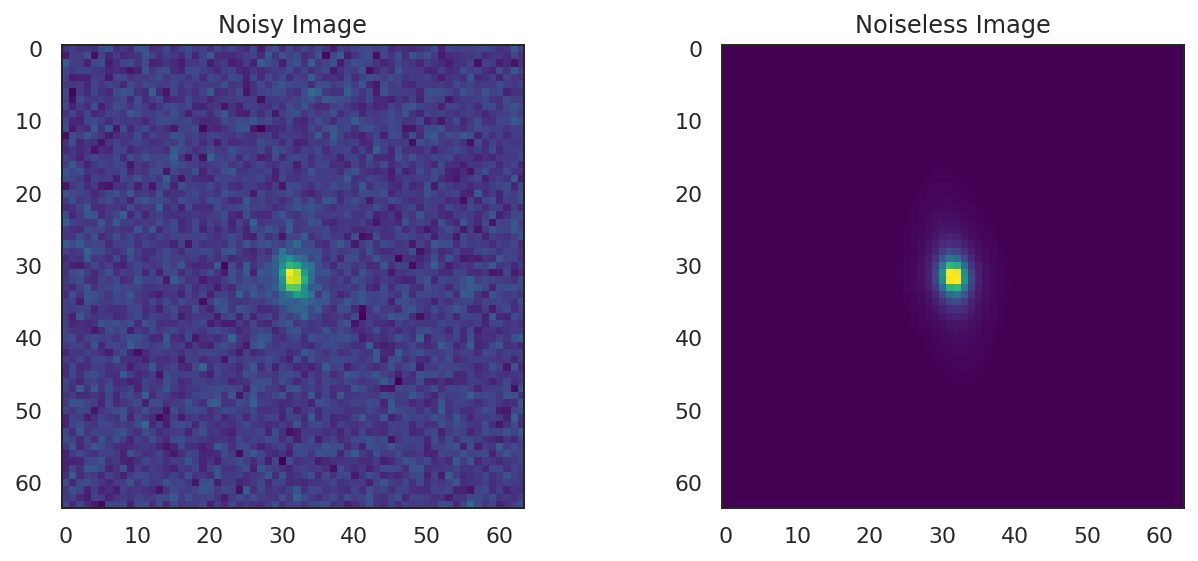

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4), tight_layout=True)
ax[0].imshow(image[0])
ax[0].set_title("Noisy Image")
ax[1].imshow(image_nonoise[0])
ax[1].set_title("Noiseless Image");